## STANDARD BOOTLEG MACRO RESEARCH TEMPLATE
The cell below imports the standard stuff and make a button to bring up the search_symbol_gui. 
With this you can search for asset data and create watchlists. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.available
plt.style.use('seaborn-v0_8')
plt.rcParams["font.family"] = "serif"
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
#%load_ext autoreload
%autoreload 2
plt.rcParams["backend"] = "QtAgg"
plt.rcParams["figure.dpi"] = 350
plt.rcParams["figure.figsize"] = (12, 5)

import os
wd = %pwd
parent = os.path.dirname(wd); grampa = os.path.dirname(parent)
fdel = os.path.sep
import sys
sys.path.append(grampa)

from MacroBackend import Utilities, PriceImporter, Pull_Data, Charting, Fitting
import datetime
import ipywidgets as widgets
from IPython.display import display, HTML, Image, Markdown, clear_output

keys = Utilities.api_keys()

######Code to run the symbol search GUI below
%gui qt
from MacroBackend import search_symbol_gui
# Declare a global variable to hold the UI dictionary
watchlist = None
 
def run_search_symbol_gui(b):
    global watchlist  # Declare the use of the global variable
    print("Running the symbol finder gui... ")
    gui = search_symbol_gui.run_app()
    watchlist = gui  # Update the global variable with the returned ui dictionary

# Step 3: Create a Button widget
button = widgets.Button(description="Search for symbols, load and create watchlists")
button2 = widgets.Button(description="Load watchlist")
# Step 4: Define an on_click event handler
button.on_click(run_search_symbol_gui)
# Step 5: Use HBox to position buttons next to each other
button.layout.width = '350px'
display(button)

/Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend /Users/jamesbishop/Documents/Python/Bootleg_Macro
Looking for api keys in SystemInfo folder... /Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/SystemInfo/API_Keys.json
API_keys found but the "API_Keys_demo.json" file is still present... Delete that file to silence this warning.
Looking for api keys in SystemInfo folder... /Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/SystemInfo/API_Keys.json
API_keys found but the "API_Keys_demo.json" file is still present... Delete that file to silence this warning.
/Users/jamesbishop/Documents/miniconda3/envs/financial/lib/node_modules
Looking for api keys in SystemInfo folder... /Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/SystemInfo/API_Keys.json
API_keys found but the "API_Keys_demo.json" file is still present... Delete that file to silence this warning.


Button(description='Search for symbols, load and create watchlists', layout=Layout(width='350px'), style=Butto…

In [2]:
######Code to run the symbol search GUI below

def load_watchlist(b) -> search_symbol_gui.Watchlist:
    global watchlist  # Declare the use of the global variable
    print("Choose your cunt you fuckstick.")
    watch = search_symbol_gui.Watchlist()
    watch.load_watchlist()
    if watch["watchlist"].empty:
        print("No watchlist loaded.")
    else:
        print("Successfully loaded watchlist.")
        watchlist = watch

button2 = widgets.Button(description="Load watchlist")
button2.on_click(load_watchlist)
display(button2)

Button(description='Load watchlist', style=ButtonStyle())

Choose your cunt you fuckstick.
Successfully loaded watchlist.


In [4]:
# watchlist.drop_data(drop_duplicates=True)
outputlist = pd.DataFrame(watchlist["watchlist"])
series_meta = pd.DataFrame(watchlist["metadata"])
# watchlist["watchlist"] = outputlist
# watchlist["metadata"] = series_meta
# outputlist.loc["price_usd_close", "id"] = "price_usd_close"
outputlist
# watchlist.save_watchlist()

,id,title,source
^SPX,^SPX,S&P 500 INDEX,yfinance
^VIX,^VIX,CBOE Volatility Index,yfinance
^NDX,^NDX,NASDAQ 100,yfinance
^DJI,^DJI,Dow Jones Industrial Average,yfinance
price_usd_close,price_usd_close,BTC,glassnode
^RUT,^RUT,Russell 2000,yfinance
000300.SS,000300.SS,CSI 300 Index,yfinance


## Pull data for the watchlist using my DataSet class...

In [5]:
watchlist.get_watchlist_data(start_date="2011-01-01")

Looking for api keys in SystemInfo folder... /Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/SystemInfo/API_Keys.json
API_keys found but the "API_Keys_demo.json" file is still present... Delete that file to silence this warning.
Looking for data from source:  yfinance data code:  ^SPX
Trying yfinance package to get historical data for  ^SPX
Looking for api keys in SystemInfo folder... /Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/SystemInfo/API_Keys.json
API_keys found but the "API_Keys_demo.json" file is still present... Delete that file to silence this warning.
Looking for data from source:  yfinance data code:  ^VIX
Trying yfinance package to get historical data for  ^VIX
Looking for api keys in SystemInfo folder... /Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/SystemInfo/API_Keys.json
API_keys found but the "API_Keys_demo.json" file is still present... Delete that file to silence this warning.
Looking for data from source:  yfinance 

In [6]:
datas = watchlist["watchlist_datasets"]
keylist = list(datas.keys())
keylist
#datas

['^SPX', '^VIX', '^NDX', '^DJI', 'price_usd_close', '^RUT', '000300.SS']

In [7]:
print(watchlist["metadata"].loc["title","price_usd_close"])
pair = Utilities.Pair_stats(datas['price_usd_close'], datas["^NDX"], windows = [90, 180, 365, 730, 1460], 
                            ser1_title=watchlist["metadata"].loc["title","price_usd_close"], 
                            ser2_title=watchlist["metadata"].loc["title","^NDX"],
                            watchlist_meta=watchlist["metadata"])#, downsample_to="W")

BTC
Series names:  ^NDX price_usd_close
Windows:  [90, 180, 365, 730, 1460]
Input series object types:  <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>
Frequency determination function for series:  price_usd_close  frequency:  D
Frequency determination function for series:  ^NDX  frequency:  None
Couldn't discern frequency in the regular manner, trying manual process....
Looks like average index timedelta is:  D , resampling series to that frequency.
Daily Daily
Whole time correlation, BTC vs NASDAQ 100 : 0.9188435847744345
Whole time correlation between log returns, BTC vs NASDAQ 100: 0.1450958819748281
Whole time correlation between percentage returns,BTC vs NASDAQ 100: 0.13894009911082794
Whole time qd correlation between log returns,BTC vs NASDAQ 100: 0.147330220397546
Rolling stats Windows:  [90, 180, 365, 730, 1460, 3411]


In [8]:
pair.data

,price_usd_close,^NDX,ret_BTC,ret_NASDAQ 100,retPct_BTC,retPct_NASDAQ 100,BTC_NASDAQ 100_Corr_90,BTC_NASDAQ 100_RetCorr_90,BTC_NASDAQ 100_PctRetCorr_90,BTC_NASDAQ 100_qdCorr_90,...,BTC_NASDAQ 100_PctRetCorr_1460,BTC_NASDAQ 100_qdCorr_1460,BTC_NASDAQ 100_beta_1460,BTC_NASDAQ 100_alpha_1460,BTC_NASDAQ 100_Corr_3411,BTC_NASDAQ 100_RetCorr_3411,BTC_NASDAQ 100_PctRetCorr_3411,BTC_NASDAQ 100_qdCorr_3411,BTC_NASDAQ 100_beta_3411,BTC_NASDAQ 100_alpha_3411
2011-01-04,0.298950,2251.459961,0.013301,-0.001230,0.013390,-0.001229,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-05,0.298920,2270.399902,-0.000100,0.008377,-0.000100,0.008412,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-06,0.298000,2277.510010,-0.003082,0.003127,-0.003078,0.003132,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-07,0.320000,2276.699951,0.071228,-0.000356,0.073826,-0.000356,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-11,0.326590,2288.729980,0.000000,0.001902,0.000000,0.001904,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-19,66707.067809,19522.619141,0.042062,-0.009303,0.042959,-0.009260,0.171851,0.225920,0.224155,0.222251,...,0.284688,0.294407,2.541136,-5315.982184,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-23,65929.590898,19754.339844,-0.025241,-0.003463,-0.024925,-0.003457,0.153324,0.229481,0.228031,0.225944,...,0.284770,0.294463,2.542157,-5307.903543,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-24,65399.019273,19032.390625,-0.008080,-0.037231,-0.008048,-0.036546,0.125847,0.224083,0.223480,0.222224,...,0.284866,0.294425,2.536184,-5222.026778,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-25,65726.344773,18830.580078,0.004993,-0.010660,0.005005,-0.010604,0.102525,0.213581,0.213214,0.212578,...,0.284760,0.294298,2.536215,-5201.595614,NaN,NaN,NaN,NaN,NaN,NaN


## BTC and NASDAQ corelations

Frequency of the pair:  Daily


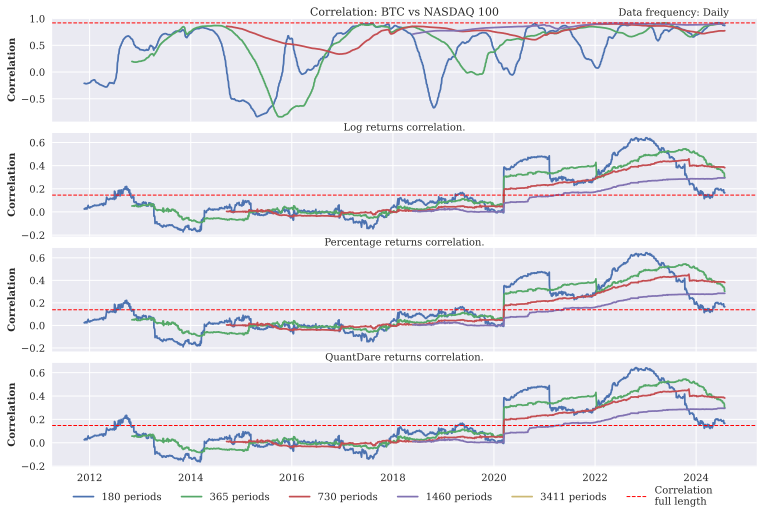

In [9]:
corrfigaxes = pair.plot_corrs(trim_windows = 1) #trim_windows = 1

Equal spaced ticks fucntion,  None None
Data is not None.
No Ymin specified, using minimum of input data.
No Ymax specified, using maximum of input data.
Left ticks:  ([0.04951, 0.23997460290057723, 1.1631551209309177, 5.637804246761661, 27.32639538169699, 132.45083579937202, 641.9882190426952, 3111.7121375806864, 15082.445658590812, 73104.50227610306], ['0.0', '0.2', '1.2', '5.6', '27.3', '132.5', '642.0', '3111.7', '15082.4', '73104.5'])
Equal spaced ticks fucntion,  None None
Data is not None.
No Ymin specified, using minimum of input data.
No Ymax specified, using maximum of input data.


/Users/jamesbishop/Documents/miniconda3/envs/financial/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/Users/jamesbishop/Documents/miniconda3/envs/financial/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


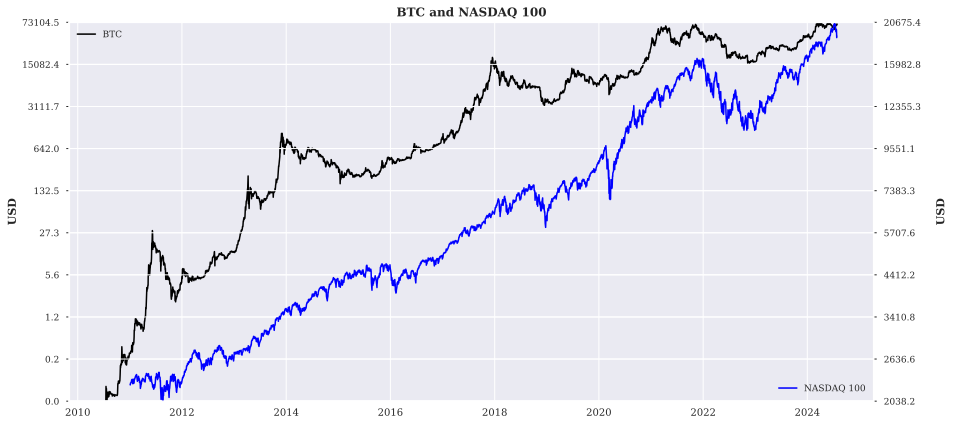

In [10]:
pair.plot_series()

Correlations for shifted series2:  [0.9189835646180229, 0.9189752576585744, 0.9189995894159906, 0.9190399414149968, 0.9190457452389089, 0.9190385641848903, 0.9190072574654345, 0.918962084636057, 0.9188830952614316, 0.918804072155154, 0.9186942115390584, 0.9185987051502926, 0.9185001270815931, 0.9183683295802337, 0.9182152025410918, 0.9181009882012828, 0.9180595670800723, 0.9179930295921451, 0.917937865399766, 0.9178679378216515, 0.9177837293522472, 0.9176720208717992, 0.9175544473624985, 0.917420265518308, 0.917324697741753, 0.9171927087009635, 0.9171198976284979, 0.9170467045466275, 0.9169590884525687, 0.9169143788076899, 0.9168657325628916, 0.9168202587732796, 0.916796988941811, 0.9167517834483736, 0.9166858275448152, 0.9166329647656047, 0.9165330470778177, 0.9164278202231501, 0.9163446847155564, 0.9162711897162359, 0.9161689213993608, 0.9160374427139746, 0.9158940777698447, 0.9157431222760752, 0.9155532665894953, 0.9153446713111314, 0.9151751227361029, 0.9149828542265953, 0.91479973

<Axes: >

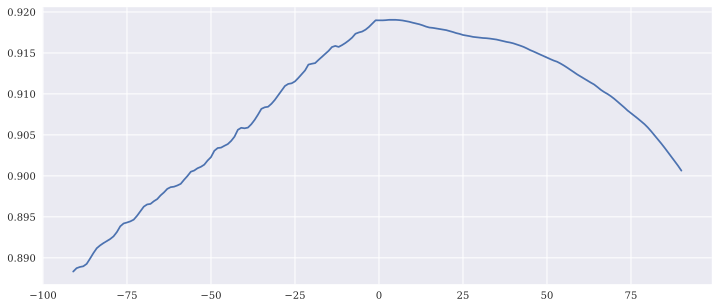

In [11]:
lagdgar, corrmaxs = pair.find_optimal_lag(90)
print(f"Optimal lag is {lagdgar} with a correlation of {corrmaxs}")
pair.lag_test.plot()

Correlations for shifted series2:  [0.1450958819748281, -0.024819212746091425, -0.032694382299361426, 0.011105765519696173, 0.03790172912243961, -0.0022144912333476106, 0.02899158422698181, 0.02004414967331693, 0.0034864539899507906, -0.004336310846957213, 0.010509927466785737, 0.026455545588305, -0.02400559022368955, 0.013536457411022934, -0.003303641902523035, 0.010317045149444093, -0.00229237847019802, -0.01827363689570003, -0.010248706400954554, -0.016712766280556672, 0.0023392889303669165, -0.014315968833014716, -0.0009488468046534163, 0.03415179919994775, -0.011074557036781157, 0.0074923464293466, -0.008995752404878593, 0.020351711798074178, 0.02751608400484628, -0.018013382245803695, -0.025410124486140565, -0.017918572662178396, -0.0051937504570304435, 0.002569044183903383, -0.0032406814214220162, 0.006814619955668475, -0.02639207082969664, -0.0006915563659334173, -0.02143568877495627, 0.002021890727676417, 0.011931888906101945, -0.012222394693244295, 0.015147907095322832, -0.01

<Axes: >

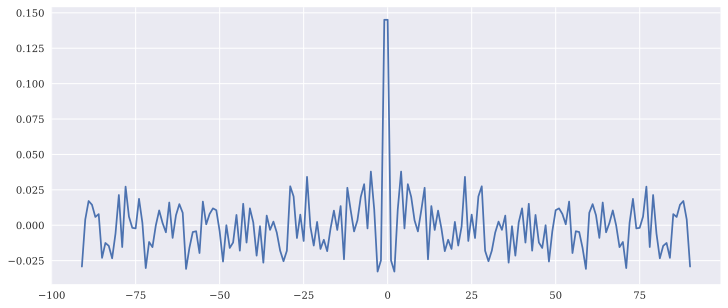

In [12]:
lagdgar, corrmaxs = pair.find_optimal_ret_lag(90)
print(f"Optimal lag is {lagdgar} with a correlation of {corrmaxs}")
pair.ret_lag_test.plot()

## BTC and RUT correlations  

In [13]:
pair2 = Utilities.Pair_stats(datas['price_usd_close'], datas["^RUT"], windows = [90, 180, 365, 730, 1460], 
                            ser1_title=watchlist["metadata"].loc["title","price_usd_close"], 
                            ser2_title=watchlist["metadata"].loc["title","^RUT"],
                            watchlist_meta=watchlist["metadata"])#, downsample_to="W")

Series names:  ^RUT price_usd_close
Windows:  [90, 180, 365, 730, 1460]
Input series object types:  <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>
Frequency determination function for series:  price_usd_close  frequency:  D
Frequency determination function for series:  ^RUT  frequency:  None
Couldn't discern frequency in the regular manner, trying manual process....
Looks like average index timedelta is:  D , resampling series to that frequency.
Daily Daily
Whole time correlation, BTC vs Russell 2000 : 0.8460646349925715
Whole time correlation between log returns, BTC vs Russell 2000: 0.14740502407041814
Whole time correlation between percentage returns,BTC vs Russell 2000: 0.14156750923665484
Whole time qd correlation between log returns,BTC vs Russell 2000: 0.14886563635103167
Rolling stats Windows:  [90, 180, 365, 730, 1460, 3411]


Frequency of the pair:  Daily


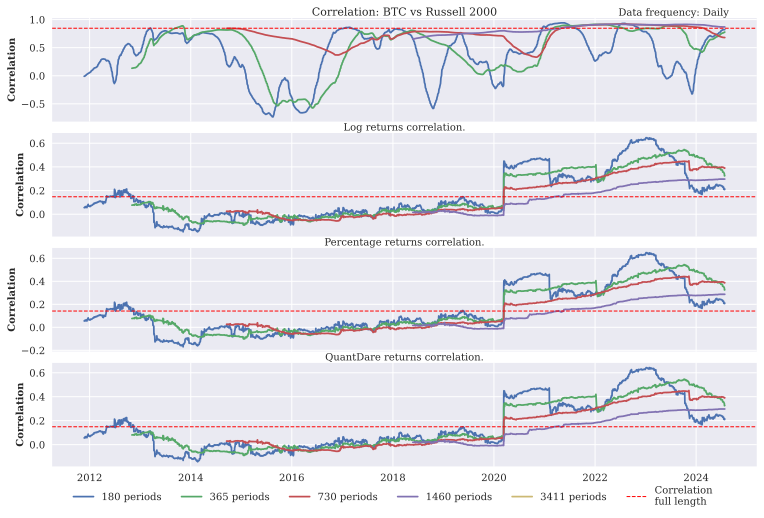

In [14]:
pair2.plot_corrs(trim_windows = 1)

Equal spaced ticks fucntion,  None None
Data is not None.
No Ymin specified, using minimum of input data.
No Ymax specified, using maximum of input data.
Left ticks:  ([0.04951, 0.23997460290057723, 1.1631551209309177, 5.637804246761661, 27.32639538169699, 132.45083579937202, 641.9882190426952, 3111.7121375806864, 15082.445658590812, 73104.50227610306], ['0.0', '0.2', '1.2', '5.6', '27.3', '132.5', '642.0', '3111.7', '15082.4', '73104.5'])
Equal spaced ticks fucntion,  None None
Data is not None.
No Ymin specified, using minimum of input data.
No Ymax specified, using maximum of input data.


/Users/jamesbishop/Documents/miniconda3/envs/financial/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/Users/jamesbishop/Documents/miniconda3/envs/financial/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


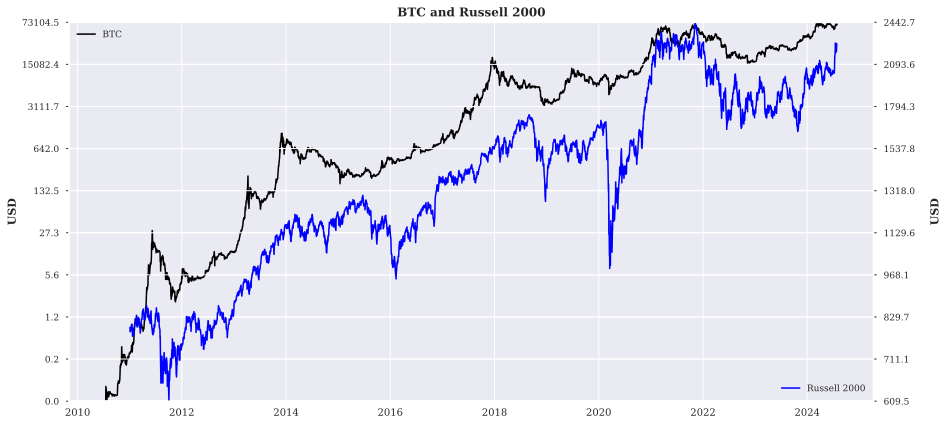

In [15]:
pair2.plot_series()

Correlations for shifted series2:  [0.8449828228618821, 0.8446702033580996, 0.8443722591460432, 0.8440656991507117, 0.843685773957999, 0.8433664711320483, 0.8429719316734604, 0.842558149748545, 0.8421004236040401, 0.8415905234744087, 0.8411288703887732, 0.8407326056043944, 0.8402628404072804, 0.8398356209196896, 0.8394769200632919, 0.8390997675222315, 0.8388361313904906, 0.8385679707969328, 0.8383443309938435, 0.8381348295734251, 0.8378756484977536, 0.8376136252519776, 0.8373107113850591, 0.8369317469719629, 0.8365926209668341, 0.8362796709095367, 0.8360119729572655, 0.8356578536684961, 0.8353407247294886, 0.8351304424929683, 0.8348957142191525, 0.8345357902571197, 0.8342767958674926, 0.8340243834095392, 0.8337151638976007, 0.833352657882342, 0.8329290139843788, 0.8324447154792042, 0.8319711789546486, 0.8314654517614226, 0.8309195737093537, 0.8303866664771018, 0.829814655664328, 0.829212040215297, 0.8286323029361916, 0.827943305590734, 0.8272641289995762, 0.826588340224292, 0.825917563

<Axes: >

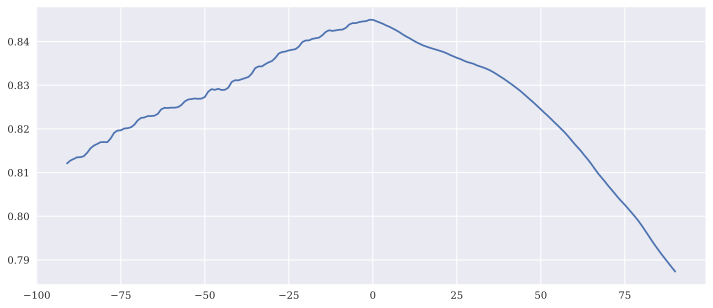

In [16]:
lag, corrmax = pair2.find_optimal_lag(90)
print(f"Optimal lag is {lag} with a correlation of {corrmax}")
pair2.lag_test.plot()